<a href="https://colab.research.google.com/github/Thinsheep/TrainingTrack/blob/main/PerceptronandKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense # Stochastic Gradient Descent is better
from keras.optimizers import Adam # adaptive method algorithm (automomatically computer the learning rate)
import matplotlib.pyplot as plt
%matplotlib inline

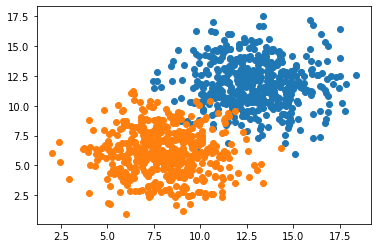

In [ ]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])


In [ ]:
model = Sequential()
#model.add() # add layers to the network
model.add(Dense(units =1, input_shape = (2,), activation = 'sigmoid'))
#dense layer is just regular layer of neutral network
adam = Adam(lr =0.1) #handel sparse gradients on noisy problems.
model.compile(adam, loss ='binary_crossentropy', metrics = ['accuracy']) #loss function to define the error
h= model.fit(x=X, y=y, verbose=1, batch_size =50, epochs = 500, shuffle ='true') # distinguish which point belongs to which class
#verbose = 1, print the information relating the performance. , =0 none
# one epob too big to fit at once and divided into several batches
#larger batch sizes can result in a significant degradation in the quality of the model.
# batch size 50 will take 200 interation to complete, batch size too much, capture underline data
#batch size too big, more time to update the weigh of neutral network, too many epod overshooting
#shuffle ='true', it shuffle the row in data, each given interation train only a subset of them.





Epoch 1/500
20/20 [==============================] - 0s 975us/step - loss: 0.6744 - accuracy: 0.6190
Epoch 2/500
20/20 [==============================] - 0s 936us/step - loss: 0.4976 - accuracy: 0.7690
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8600
Epoch 4/500
20/20 [==============================] - 0s 986us/step - loss: 0.3413 - accuracy: 0.9080
Epoch 5/500
20/20 [==============================] - 0s 990us/step - loss: 0.2957 - accuracy: 0.9290
Epoch 6/500
20/20 [==============================] - 0s 897us/step - loss: 0.2568 - accuracy: 0.9470
Epoch 7/500
20/20 [==============================] - 0s 909us/step - loss: 0.2387 - accuracy: 0.9460
Epoch 8/500
20/20 [==============================] - 0s 950us/step - loss: 0.2077 - accuracy: 0.9600
Epoch 9/500
20/20 [==============================] - 0s 993us/step - loss: 0.1890 - accuracy: 0.9700
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1802 - accuracy: 

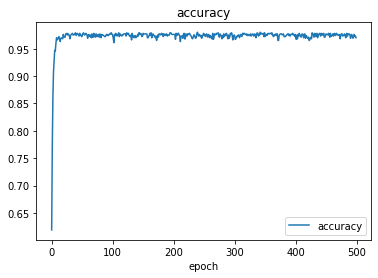

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

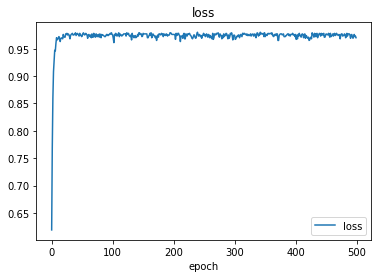

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [ ]:
def plot_decision_boundary(X, y, model): # model contain all neutral network data, X (array of data) and y(label) are two classes.
  x_span = np.linspace(min(X[:, 1]) -1 , max(X[:, 1]) + 1, 50) #: mean every single row, min(X[:, 0]) give minimum value of first column
  # all value of the first index column, maximum horizontal value of first column
  # from minimum horizontal coordinate to maximum horizontal coordinate
  y_span = np.linspace(min(X[:, 1]) -1, max(X[:, 1]) + 1, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel() # .ravel() change to one dimensional array
  print(X)
  print(y_span)
  print(yy)
  print(yy_)
  grid = np.c_[xx_, yy_]
  print(grid)
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

[[16.52810469 12.76546486]
 [13.80031442 11.93151544]
 [14.95747597 14.19269369]
 ...
 [ 7.50641288  6.31686769]
 [ 5.84131367  3.71619716]
 [ 7.7715489   3.37805926]]
[-0.08247762  0.29713846  0.67675454  1.05637062  1.4359867   1.81560278
  2.19521886  2.57483493  2.95445101  3.33406709  3.71368317  4.09329925
  4.47291533  4.8525314   5.23214748  5.61176356  5.99137964  6.37099572
  6.7506118   7.13022787  7.50984395  7.88946003  8.26907611  8.64869219
  9.02830827  9.40792435  9.78754042 10.1671565  10.54677258 10.92638866
 11.30600474 11.68562082 12.06523689 12.44485297 12.82446905 13.20408513
 13.58370121 13.96331729 14.34293337 14.72254944 15.10216552 15.4817816
 15.86139768 16.24101376 16.62062984 17.00024591 17.37986199 17.75947807
 18.13909415 18.51871023]
[[-0.08247762 -0.08247762 -0.08247762 ... -0.08247762 -0.08247762
  -0.08247762]
 [ 0.29713846  0.29713846  0.29713846 ...  0.29713846  0.29713846
   0.29713846]
 [ 0.67675454  0.67675454  0.67675454 ...  0.67675454  0.6767

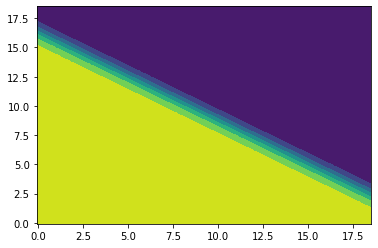

In [ ]:
plot_decision_boundary(X, y, model)


[[16.52810469 12.76546486]
 [13.80031442 11.93151544]
 [14.95747597 14.19269369]
 ...
 [ 7.50641288  6.31686769]
 [ 5.84131367  3.71619716]
 [ 7.7715489   3.37805926]]
[-0.08247762  0.29713846  0.67675454  1.05637062  1.4359867   1.81560278
  2.19521886  2.57483493  2.95445101  3.33406709  3.71368317  4.09329925
  4.47291533  4.8525314   5.23214748  5.61176356  5.99137964  6.37099572
  6.7506118   7.13022787  7.50984395  7.88946003  8.26907611  8.64869219
  9.02830827  9.40792435  9.78754042 10.1671565  10.54677258 10.92638866
 11.30600474 11.68562082 12.06523689 12.44485297 12.82446905 13.20408513
 13.58370121 13.96331729 14.34293337 14.72254944 15.10216552 15.4817816
 15.86139768 16.24101376 16.62062984 17.00024591 17.37986199 17.75947807
 18.13909415 18.51871023]
[[-0.08247762 -0.08247762 -0.08247762 ... -0.08247762 -0.08247762
  -0.08247762]
 [ 0.29713846  0.29713846  0.29713846 ...  0.29713846  0.29713846
   0.29713846]
 [ 0.67675454  0.67675454  0.67675454 ...  0.67675454  0.6767

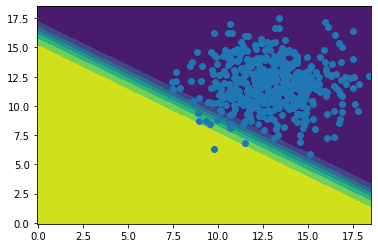

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])


[[16.52810469 12.76546486]
 [13.80031442 11.93151544]
 [14.95747597 14.19269369]
 ...
 [ 7.50641288  6.31686769]
 [ 5.84131367  3.71619716]
 [ 7.7715489   3.37805926]]
[-0.08247762  0.29713846  0.67675454  1.05637062  1.4359867   1.81560278
  2.19521886  2.57483493  2.95445101  3.33406709  3.71368317  4.09329925
  4.47291533  4.8525314   5.23214748  5.61176356  5.99137964  6.37099572
  6.7506118   7.13022787  7.50984395  7.88946003  8.26907611  8.64869219
  9.02830827  9.40792435  9.78754042 10.1671565  10.54677258 10.92638866
 11.30600474 11.68562082 12.06523689 12.44485297 12.82446905 13.20408513
 13.58370121 13.96331729 14.34293337 14.72254944 15.10216552 15.4817816
 15.86139768 16.24101376 16.62062984 17.00024591 17.37986199 17.75947807
 18.13909415 18.51871023]
[[-0.08247762 -0.08247762 -0.08247762 ... -0.08247762 -0.08247762
  -0.08247762]
 [ 0.29713846  0.29713846  0.29713846 ...  0.29713846  0.29713846
   0.29713846]
 [ 0.67675454  0.67675454  0.67675454 ...  0.67675454  0.6767

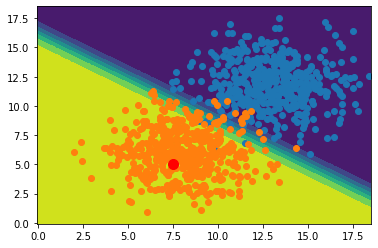

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
x =7.5
y =5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = "o", markersize =10, color="red" )
print("Prediction is:", prediction)